In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
DATASETS_PATH = os.path.join('..', 'datasets')
ANALISIS_SUBSET_PATH = os.path.join(DATASETS_PATH, 'subset_analisis.csv')
ML_SUBSET1_PATH = os.path.join(DATASETS_PATH, 'subset_clasif.csv')
ML_SUBSET2_PATH = os.path.join(DATASETS_PATH, 'subset_regres.csv')

### Información útil

In [4]:
tipos_dic = {
    0: 'Infectado',
    1: 'Fallecido'
}

In [85]:
generos_dic = {
    0: 'Hombre',
    1: 'Mujer'
}

In [5]:
estados_dic = {
    1: 'AGS',
    2: 'BC',
    3: 'BCS',
    4: 'CAM',
    5: 'COAH',
    6: 'COL',
    7: 'CHIA',
    8: 'CHIH',
    9: 'CDMX',
    10: 'DUR',
    11: 'GJTO',
    12: 'GUE',
    13: 'HID',
    14: 'JAL',
    15: 'EDOMEX',
    16: 'MICH',
    17: 'MOR',
    18: 'NAY',
    19: 'NLEON',
    20: 'OAX',
    21: 'PUE',
    22: 'QUE',
    23: 'QROO',
    24: 'SLP',
    25: 'SIN',
    26: 'SON',
    27: 'TAB',
    28: 'TAM',
    29: 'TLAX',
    30: 'VER',
    31: 'YUC',
    32: 'ZAC',
    36: 'EUM',
    97: 'NA',
    98: 'IGNORA',
    99: 'NOESPEC'
}

In [6]:
dtypes = {
    'SECTOR': np.int8,
    'ENTIDAD_UM': np.int8,
    'SEXO': np.int8,
    'PAC_HOSPITALIZADO': np.int8,
    'INTUBADO': np.int8,
    'NEUMONIA': np.int8,
    'EDAD': np.int8,
    'EMBARAZO': np.int8,
    'DIABETES': np.int8,
    'EPOC': np.int8,
    'ASMA': np.int8,
    'INMUSUPR': np.int8,
    'HIPERTENSION': np.int8,
    'CARDIOVASCULAR': np.int8,
    'OBESIDAD': np.int8,
    'RENAL_CRONICA': np.int8,
    'TABAQUISMO': np.int8,
    'UCI': np.int8,
    'MES_INGRESO': np.int8,
    'AÃO_INGRESO': np.int16,
    'MES_DEF': np.int8,
    'AÃO_DEF': np.int16,
}

### Cargando Datos

In [7]:
analisis_df = pd.read_csv(ANALISIS_SUBSET_PATH, dtype=dtypes, index_col=0, encoding='latin')
analisis_df.info()

C:\Users\Sebastián\AppData\Roaming\Python\Python38\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667730 entries, 0 to 10785803
Data columns (total 22 columns):
 #   Column             Dtype
---  ------             -----
 0   SECTOR             int8 
 1   ENTIDAD_UM         int8 
 2   SEXO               int8 
 3   PAC_HOSPITALIZADO  int8 
 4   INTUBADO           int8 
 5   NEUMONIA           int8 
 6   EDAD               int8 
 7   EMBARAZO           int8 
 8   DIABETES           int8 
 9   EPOC               int8 
 10  ASMA               int8 
 11  INMUSUPR           int8 
 12  HIPERTENSION       int8 
 13  CARDIOVASCULAR     int8 
 14  OBESIDAD           int8 
 15  RENAL_CRONICA      int8 
 16  TABAQUISMO         int8 
 17  UCI                int8 
 18  MES_INGRESO        int8 
 19  AÃO_INGRESO       int16
 20  MES_DEF            int8 
 21  AÃO_DEF           int16
dtypes: int16(2), int8(20)
memory usage: 111.9 MB


In [8]:
analisis_df.rename({'AÃO_INGRESO': 'AÑO_INGRESO', 'AÃO_DEF': 'AÑO_DEF'}, axis=1, inplace=True)

In [9]:
clasif_df = pd.read_csv(ML_SUBSET1_PATH, dtype=np.int8, index_col=0)
clasif_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667730 entries, 0 to 11
Data columns (total 16 columns):
 #   Column             Dtype
---  ------             -----
 0   SEXO               int8 
 1   PAC_HOSPITALIZADO  int8 
 2   NEUMONIA           int8 
 3   EDAD               int8 
 4   EMBARAZO           int8 
 5   DIABETES           int8 
 6   EPOC               int8 
 7   ASMA               int8 
 8   INMUSUPR           int8 
 9   HIPERTENSION       int8 
 10  CARDIOVASCULAR     int8 
 11  OBESIDAD           int8 
 12  RENAL_CRONICA      int8 
 13  TABAQUISMO         int8 
 14  DIAS_SINTOMAS      int8 
 15  FALLECIDO          int8 
dtypes: int8(16)
memory usage: 83.9 MB


In [99]:
regres_df = pd.read_csv(ML_SUBSET2_PATH, dtype=np.int16, index_col=0)
regres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275205 entries, 1 to -28330
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   SEXO               275205 non-null  int16
 1   PAC_HOSPITALIZADO  275205 non-null  int16
 2   NEUMONIA           275205 non-null  int16
 3   EDAD               275205 non-null  int16
 4   EMBARAZO           275205 non-null  int16
 5   DIABETES           275205 non-null  int16
 6   EPOC               275205 non-null  int16
 7   ASMA               275205 non-null  int16
 8   INMUSUPR           275205 non-null  int16
 9   HIPERTENSION       275205 non-null  int16
 10  CARDIOVASCULAR     275205 non-null  int16
 11  OBESIDAD           275205 non-null  int16
 12  RENAL_CRONICA      275205 non-null  int16
 13  TABAQUISMO         275205 non-null  int16
 14  DIAS_SINTOMAS      275205 non-null  int16
 15  DIAS_DEF           275205 non-null  int16
dtypes: int16(16)
memory usage: 10.5 MB


In [11]:
def is_dead(x):
    if x==9999: return 0
    else: return 1

In [12]:
analisis_df['FALLECIDO'] = analisis_df['AÑO_DEF'].apply(is_dead).astype(np.int8)

# Generando gráficas interesantes

Tenemos planeado responder las siguientes cuestiones:

- Comparación de infectados y muertos por estado (Gráf. vertical de barras apiladas)
- Porcentaje de fallecidos e infectados por ordenados estado (Graf. vert de barras apiladas)
- Comparación de infectados y muertos por género (Gráf. horizontal de barras apiladas)
- Días que toma a un paciente fallecer según edad (Gráf . de dispersión)
- Progreso de la pandemia cada mes (Gráf. de línea)
- Distribución de pacientes según edad (Histograma)
- Infectados y fallecidos según grupo de edad (Gráf. horiz. de barras apiladas)
- Porcentaje de infectados vs. fallecidos según grupo de edad (Gráf. horiz. de barras apiladas)
- Infectados y fallecidos según sectores de salud (Gráf. horiz. de barras apiladas)
- Porcentaje de infectados vs. fallecidos según sectores de salud (Gráf. horiz. de barras apiladas)
- Porcentaje de infectados vs. fallecidos según affeciones de salud previas (Graf. horiz. de barras apiladas)

## Comparación de infectados y fallecidos por estado

Primero agrupamos los datos por estado y luego por tipo de paciente, y después generamos el conteo

In [46]:
conteo_estado = analisis_df[['FALLECIDO']].groupby([analisis_df['ENTIDAD_UM'], analisis_df['FALLECIDO']]).count()
conteo_estado

FALLECIDO
ENTIDAD_UM FALLECIDO           
1          0              31056
           1               2816
2          0              51847
           1               8962
3          0              52610
...                         ...
30         1              13526
31         0              65505
           1               5402
32         0              37475
           1               3197

[64 rows x 1 columns]

Para graficar los datos, necesitamos cambiar el formato de los datos, así como el nombre de las variables y los valores que poseen. Para ello, programamos una pequeña función que nos devuelve un dataframe en un formato que esté listo para graficar.

#### Funcion para formatear dataframe

In [139]:
def create_plot_dataframe(data, key1, key2, keyvals, newkey1, newkey2, newkeyvals, newvals1, newvals2):
    df = data.copy()
    # Cambiar nombre columna repetida
    df.rename({keyvals: newkeyvals}, axis=1, inplace=True)
    # Unravel
    df.reset_index(inplace=True)
    # Cambiar nombres columnas nuevas
    df.rename({key1: newkey1, key2: newkey2}, axis=1, inplace=True)
    # Cambiar valores
    if(newvals1): df[newkey1] = df[newkey1].apply(lambda x: newvals1[x])
    if(newvals2): df[newkey2] = df[newkey2].apply(lambda x: newvals2[x])
    # Regresar pivote
    return df.pivot(index=newkey1, columns=newkey2, values=newkeyvals)

In [48]:
conteo_estado = create_plot_dataframe(conteo_estado, 'ENTIDAD_UM', 'FALLECIDO', 'FALLECIDO', 'ENTIDAD', 'TIPO', 'CONTEO', estados_dic, tipos_dic)

Los datos de la CDXM son mucho más altos que los demás, y esto puede causar que la gráfica se vea mal. Para evitar problemas, removemos los registros de la CDMX.

In [51]:
conteo_estado_sin_cdmx = conteo_estado.drop('CDMX', axis=0)

Una vez formateado el dataframe, podemos graficar los datos en una sólo línea de código, usando la integración de Pandas con Matplotlib.

<AxesSubplot:xlabel='ENTIDAD'>

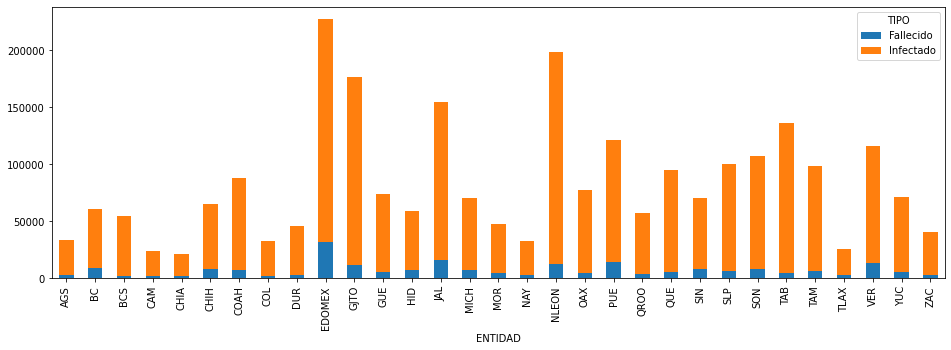

In [52]:
conteo_estado_sin_cdmx.plot(kind='bar', stacked=True, figsize=(16,5))

## Porcentaje de fallecidos por estado

In [64]:
conteo_estado['% de fallecidos'] = conteo_estado.apply(lambda x: (x.Fallecido/(x.Fallecido + x.Infectado))*100, axis=1)

In [67]:
conteo_estado.head(5)

TIPO,Fallecido,Infectado,% de fallecidos
ENTIDAD,,,
AGS,2816,31056,8.313651
BC,8962,51847,14.737950
BCS,2262,52610,4.122321
CAM,1924,21678,8.151852
CDMX,50552,1033619,4.662733


In [71]:
conteo_estado_ordenado = conteo_estado.sort_values('% de fallecidos', axis=0, ascending=False)
conteo_estado_ordenado.head(5)

TIPO,Fallecido,Infectado,% de fallecidos
ENTIDAD,,,
BC,8962,51847,14.737950
EDOMEX,31642,195483,13.931535
HID,7430,51384,12.633047
CHIH,7828,57483,11.985730
PUE,14378,107178,11.828293


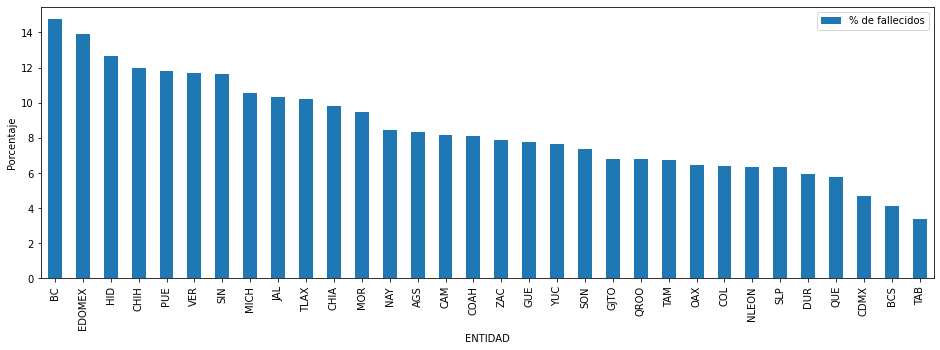

In [79]:
conteo_estado_ordenado.plot(y='% de fallecidos', kind='bar', figsize=(16, 5))
_ = plt.ylabel('Porcentaje')

## Comparación de infectados y muertos por género

In [88]:
conteo_genero = analisis_df[['FALLECIDO']].groupby([analisis_df['SEXO'], analisis_df['FALLECIDO']]).count()
conteo_genero

FALLECIDO
SEXO FALLECIDO           
0    0            1664626
     1             170491
1    0            1727608
     1             105005

In [89]:
conteo_genero = create_plot_dataframe(conteo_genero, 'SEXO', 'FALLECIDO', 'FALLECIDO', 'SEXO', 'RESULTADO', 'CONTEO',
                                     generos_dic, tipos_dic)
conteo_genero

RESULTADO,Fallecido,Infectado
SEXO,,
Hombre,170491,1664626
Mujer,105005,1727608


<AxesSubplot:xlabel='SEXO'>

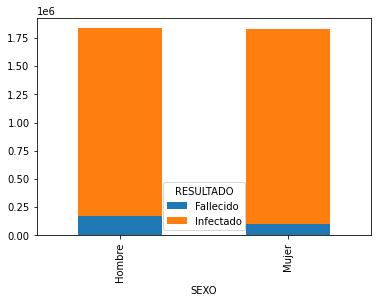

In [91]:
conteo_genero.plot(kind='bar', stacked=True)

No parece haber una diferencia sustancial entre la cantidad de infectados por género, aunque sí se nota un mayor número de fallecidos en el género masculino.

## Días que toma a un paciente fallecer según edad

In [101]:
regres_df.head(3)

,SEXO,PAC_HOSPITALIZADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,DIAS_SINTOMAS,DIAS_DEF
1,1,1,1,66,0,1,0,0,0,1,0,1,0,0,3,1
152,0,1,1,58,0,1,0,0,0,1,1,0,1,0,2,3
174,1,1,1,30,0,0,0,0,0,0,0,0,1,0,0,0


Text(0, 0.5, 'Expectativa de vida (en días)')

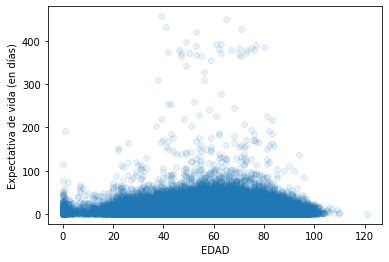

In [110]:
plt.scatter(x=regres_df['EDAD'], y=regres_df['DIAS_DEF'], alpha=0.1)
plt.xlabel('EDAD')
plt.ylabel('Expectativa de vida (en días)')

In [112]:
def get_age_group(x):
    if x <= 5: return 'Bebé'
    elif x <= 12: return 'Infante'
    elif x <= 21: return 'Adolescente'
    elif x <= 40: return 'Adulto Joven'
    elif x <= 65: return 'Adulto'
    else: return 'Adulto Mayor'

In [115]:
regres_df['GRUPO_EDAD'] = regres_df['EDAD'].apply(get_age_group)

In [116]:
regres_df.head(3)

,SEXO,PAC_HOSPITALIZADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,DIAS_SINTOMAS,DIAS_DEF,GRUPO_EDAD
1,1,1,1,66,0,1,0,0,0,1,0,1,0,0,3,1,Adulto Mayor
152,0,1,1,58,0,1,0,0,0,1,1,0,1,0,2,3,Adulto
174,1,1,1,30,0,0,0,0,0,0,0,0,1,0,0,0,Adulto Joven


In [131]:
fall_edades = regres_df[['GRUPO_EDAD', 'EDAD']].groupby(['GRUPO_EDAD']).count()
# fall_edades.rename({'EDAD': 'No. de Fallecidos'}, axis=1, inplace=True)
fall_edades

,No. de Fallecidos
GRUPO_EDAD,
Adolescente,812
Adulto,130318
Adulto Joven,18553
Adulto Mayor,124890
Bebé,468
Infante,164


<AxesSubplot:xlabel='GRUPO_EDAD', ylabel='DIAS_DEF'>

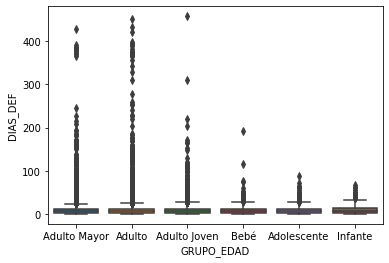

In [133]:
sns.boxplot(x='GRUPO_EDAD', y="DIAS_DEF", data=regres_df)

## Distribución de pacientes según edad (Histograma)

## Infectados y fallecidos según grupo de edad (Gráf. horiz. de barras apiladas)

In [134]:
analisis_df['GRUPO_EDAD'] = analisis_df['EDAD'].apply(get_age_group)

In [136]:
analisis_df.head(3)

,SECTOR,ENTIDAD_UM,SEXO,PAC_HOSPITALIZADO,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,MES_INGRESO,AÑO_INGRESO,MES_DEF,AÑO_DEF,FALLECIDO,GRUPO_EDAD
0,12,9,0,0,0,0,41,0,0,0,...,0,0,0,0,10,2020,99,9999,0,Adulto
1,12,23,1,1,1,1,66,0,1,0,...,1,0,0,1,7,2020,7,2020,1,Adulto Mayor
8,12,12,0,0,0,0,47,0,1,0,...,0,0,0,0,8,2020,99,9999,0,Adulto


In [138]:
conteo_genero = analisis_df[['FALLECIDO']].groupby([analisis_df['GRUPO_EDAD'], analisis_df['FALLECIDO']]).count()

In [140]:
conteo_genero = create_plot_dataframe(conteo_genero, 'GRUPO_EDAD', 'FALLECIDO', 'FALLECIDO', 'GRUPO DE EDAD', 'RESULTADO', 'CONTEO',
                                     None, tipos_dic)

In [143]:
conteo_genero

RESULTADO,Fallecido,Infectado
GRUPO DE EDAD,,
Adolescente,815,287908
Adulto,130460,1262236
Adulto Joven,18568,1514760
Adulto Mayor,125021,231066
Bebé,468,30895
Infante,164,65369


AttributeError: module 'matplotlib.pyplot' has no attribute 'ytick'

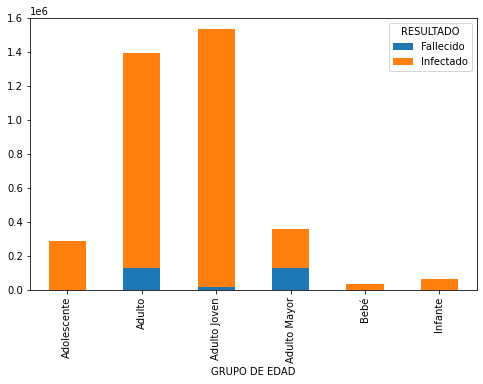

In [147]:
conteo_genero.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.ylim([0.0, 1600000.0])
plt.ytick(range(0, 200000))

## Porcentaje de infectados vs. fallecidos según grupo de edad (Gráf. horiz. de barras apiladas)

## Infectados y fallecidos según sectores de salud (Gráf. horiz. de barras apiladas)

## Porcentaje de infectados vs. fallecidos según sectores de salud (Gráf. horiz. de barras apiladas)

## Porcentaje de infectados vs. fallecidos según affeciones de salud previas (Graf. horiz. de barras apiladas)